In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

In [ ]:
file_path = 'financial_transactions.csv'
df_ft = pd.read_csv(file_path)
print(df_ft.head())
print("\n")
print(df_ft.info())


  transaction_id                        date  amount   category     merchant  \
0         T-1043  2024-08-26 14:40:08.881401  183.42  Utilities  Water Works   
1         T-1073  2024-08-26 14:40:08.881401  125.45  Groceries  Whole Foods   
2          T-501  2024-08-26 14:40:08.881401   83.94     Travel         Uber   
3           T-86  2024-08-26 14:40:08.881401   78.53   Shopping   Mall Store   
4         T-1004  2024-08-26 14:40:08.881401   59.15  Groceries       Costco   

   payment_method account_type transaction_type  \
0   Bank Transfer      Savings          Deposit   
1      Debit Card      Savings          Payment   
2  Mobile Payment   Investment          Payment   
3     Credit Card     Checking          Payment   
4   Bank Transfer     Checking         Transfer   

                                        description  
0  Defense late little he truth contain hear share.  
1            Certainly turn growth cell heavy live.  
2       Physical audience include majority natural

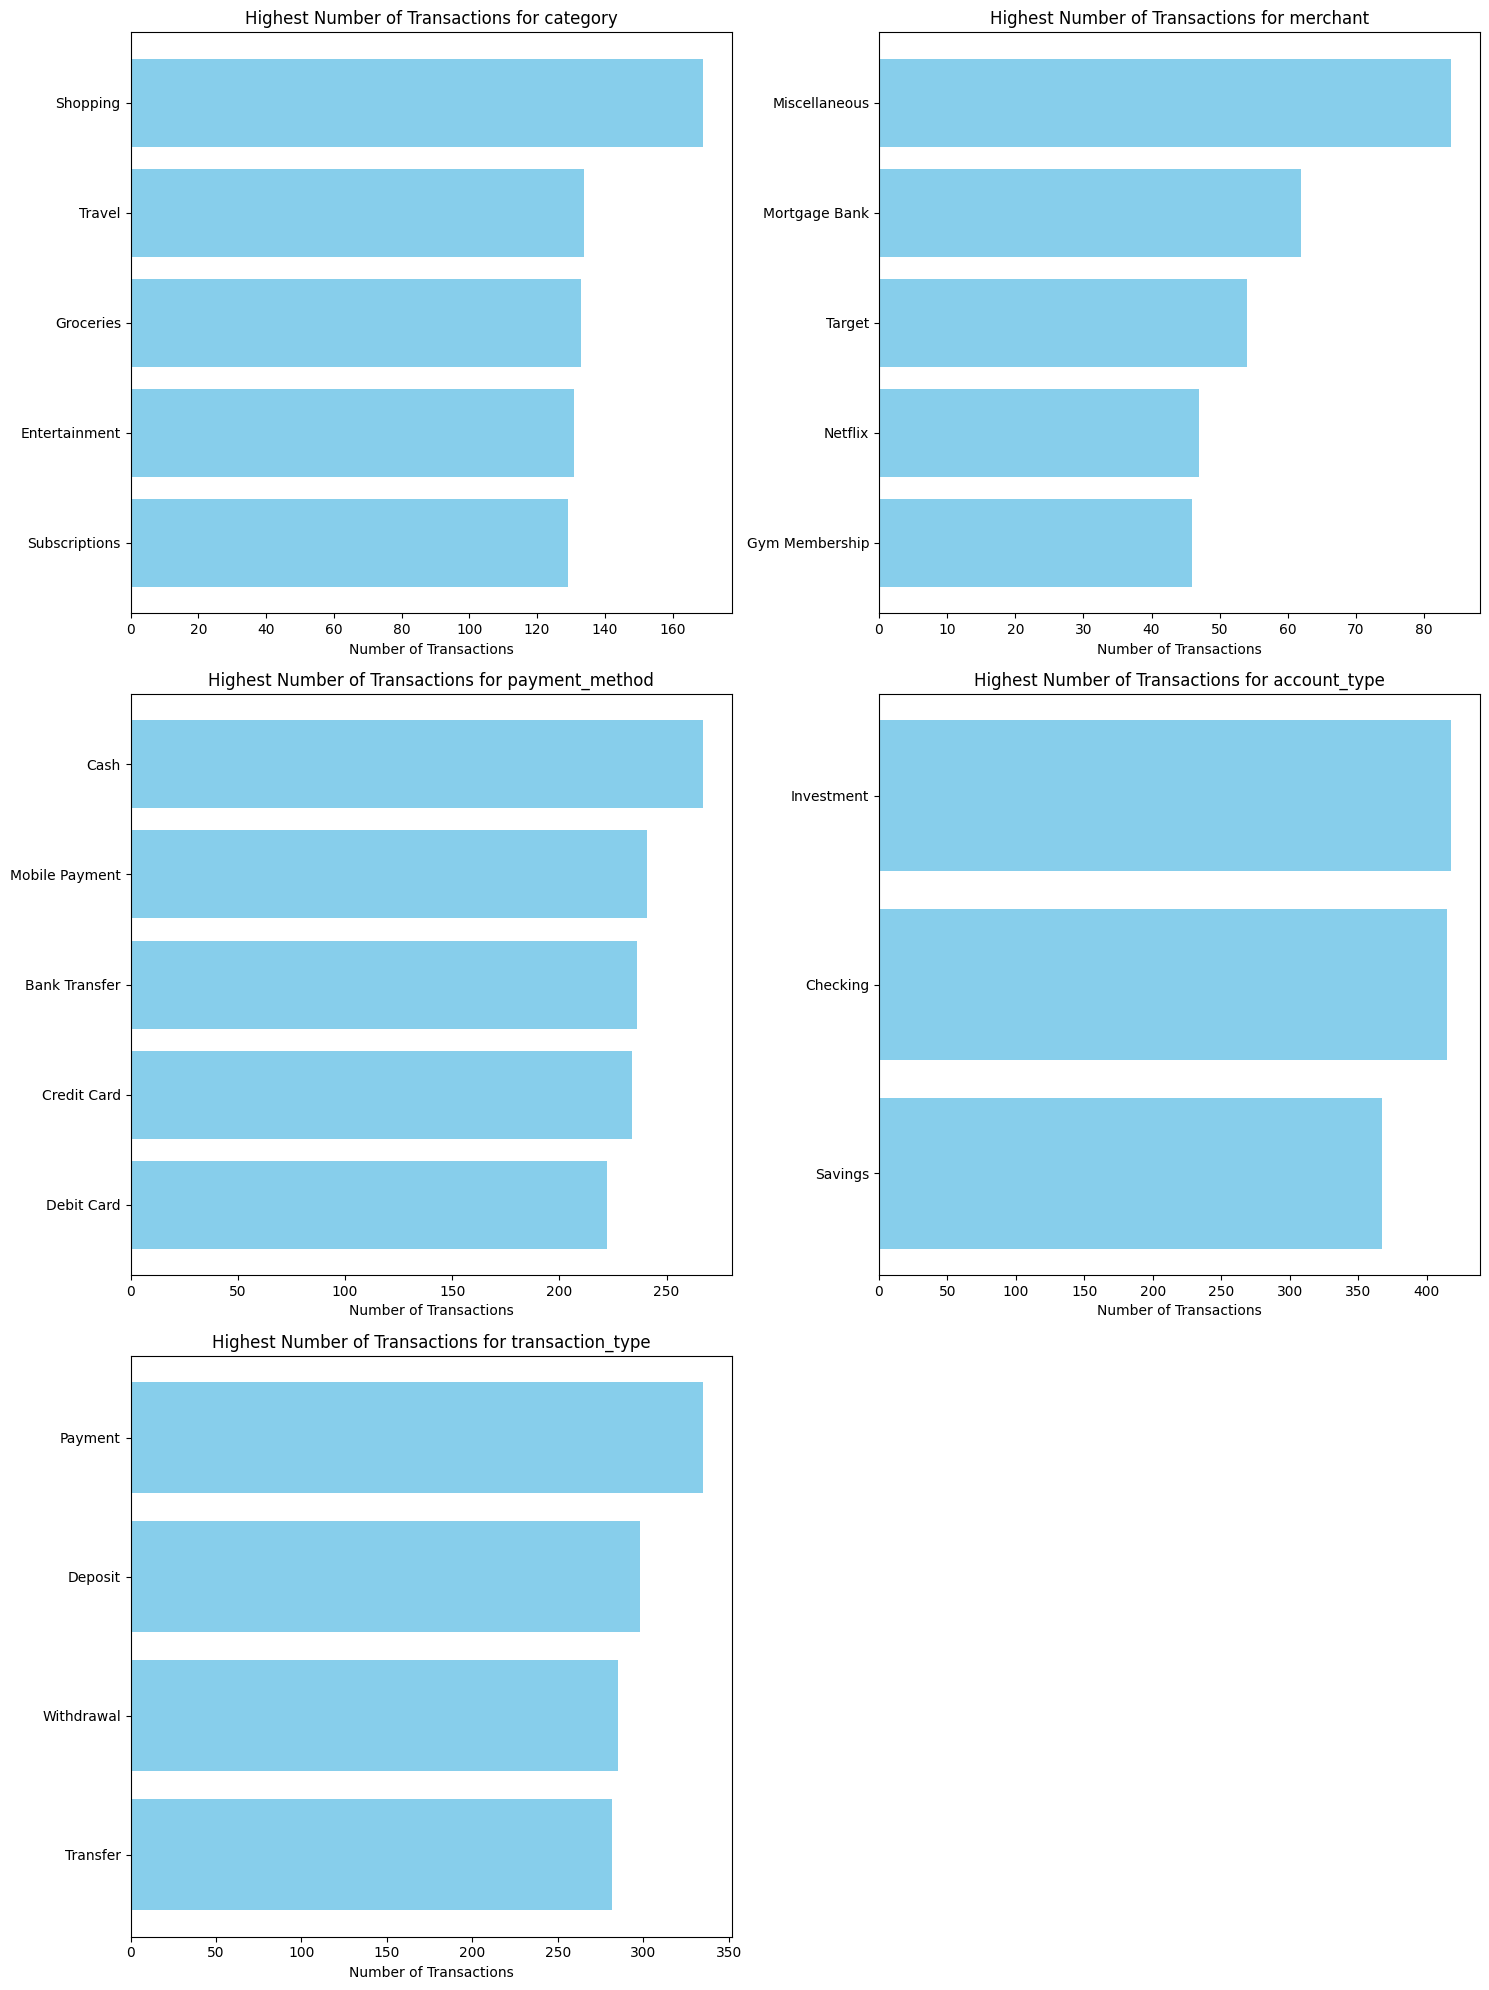

In [167]:
# columns that have categorical breakdowns
breakdown_cols = ['category', 'merchant', 'payment_method', 'account_type', 'transaction_type']

fig, ax = plt.subplots(3, 2, figsize=(15, 20))

ax = ax.flatten()

for i, col in enumerate(breakdown_cols):
    counts = df_ft[col].value_counts().head(5)  # only top 5
    # plot the number of transactions for each categorical breakdown
    ax[i].barh(counts.index, counts.values, color='skyblue')
    ax[i].set_title(f"Highest Number of Transactions for {col}", fontsize=12)
    ax[i].set_xlabel("Number of Transactions")
    ax[i].invert_yaxis()

fig.delaxes(ax[5]) # remove empty subplot

plt.tight_layout()
plt.show()

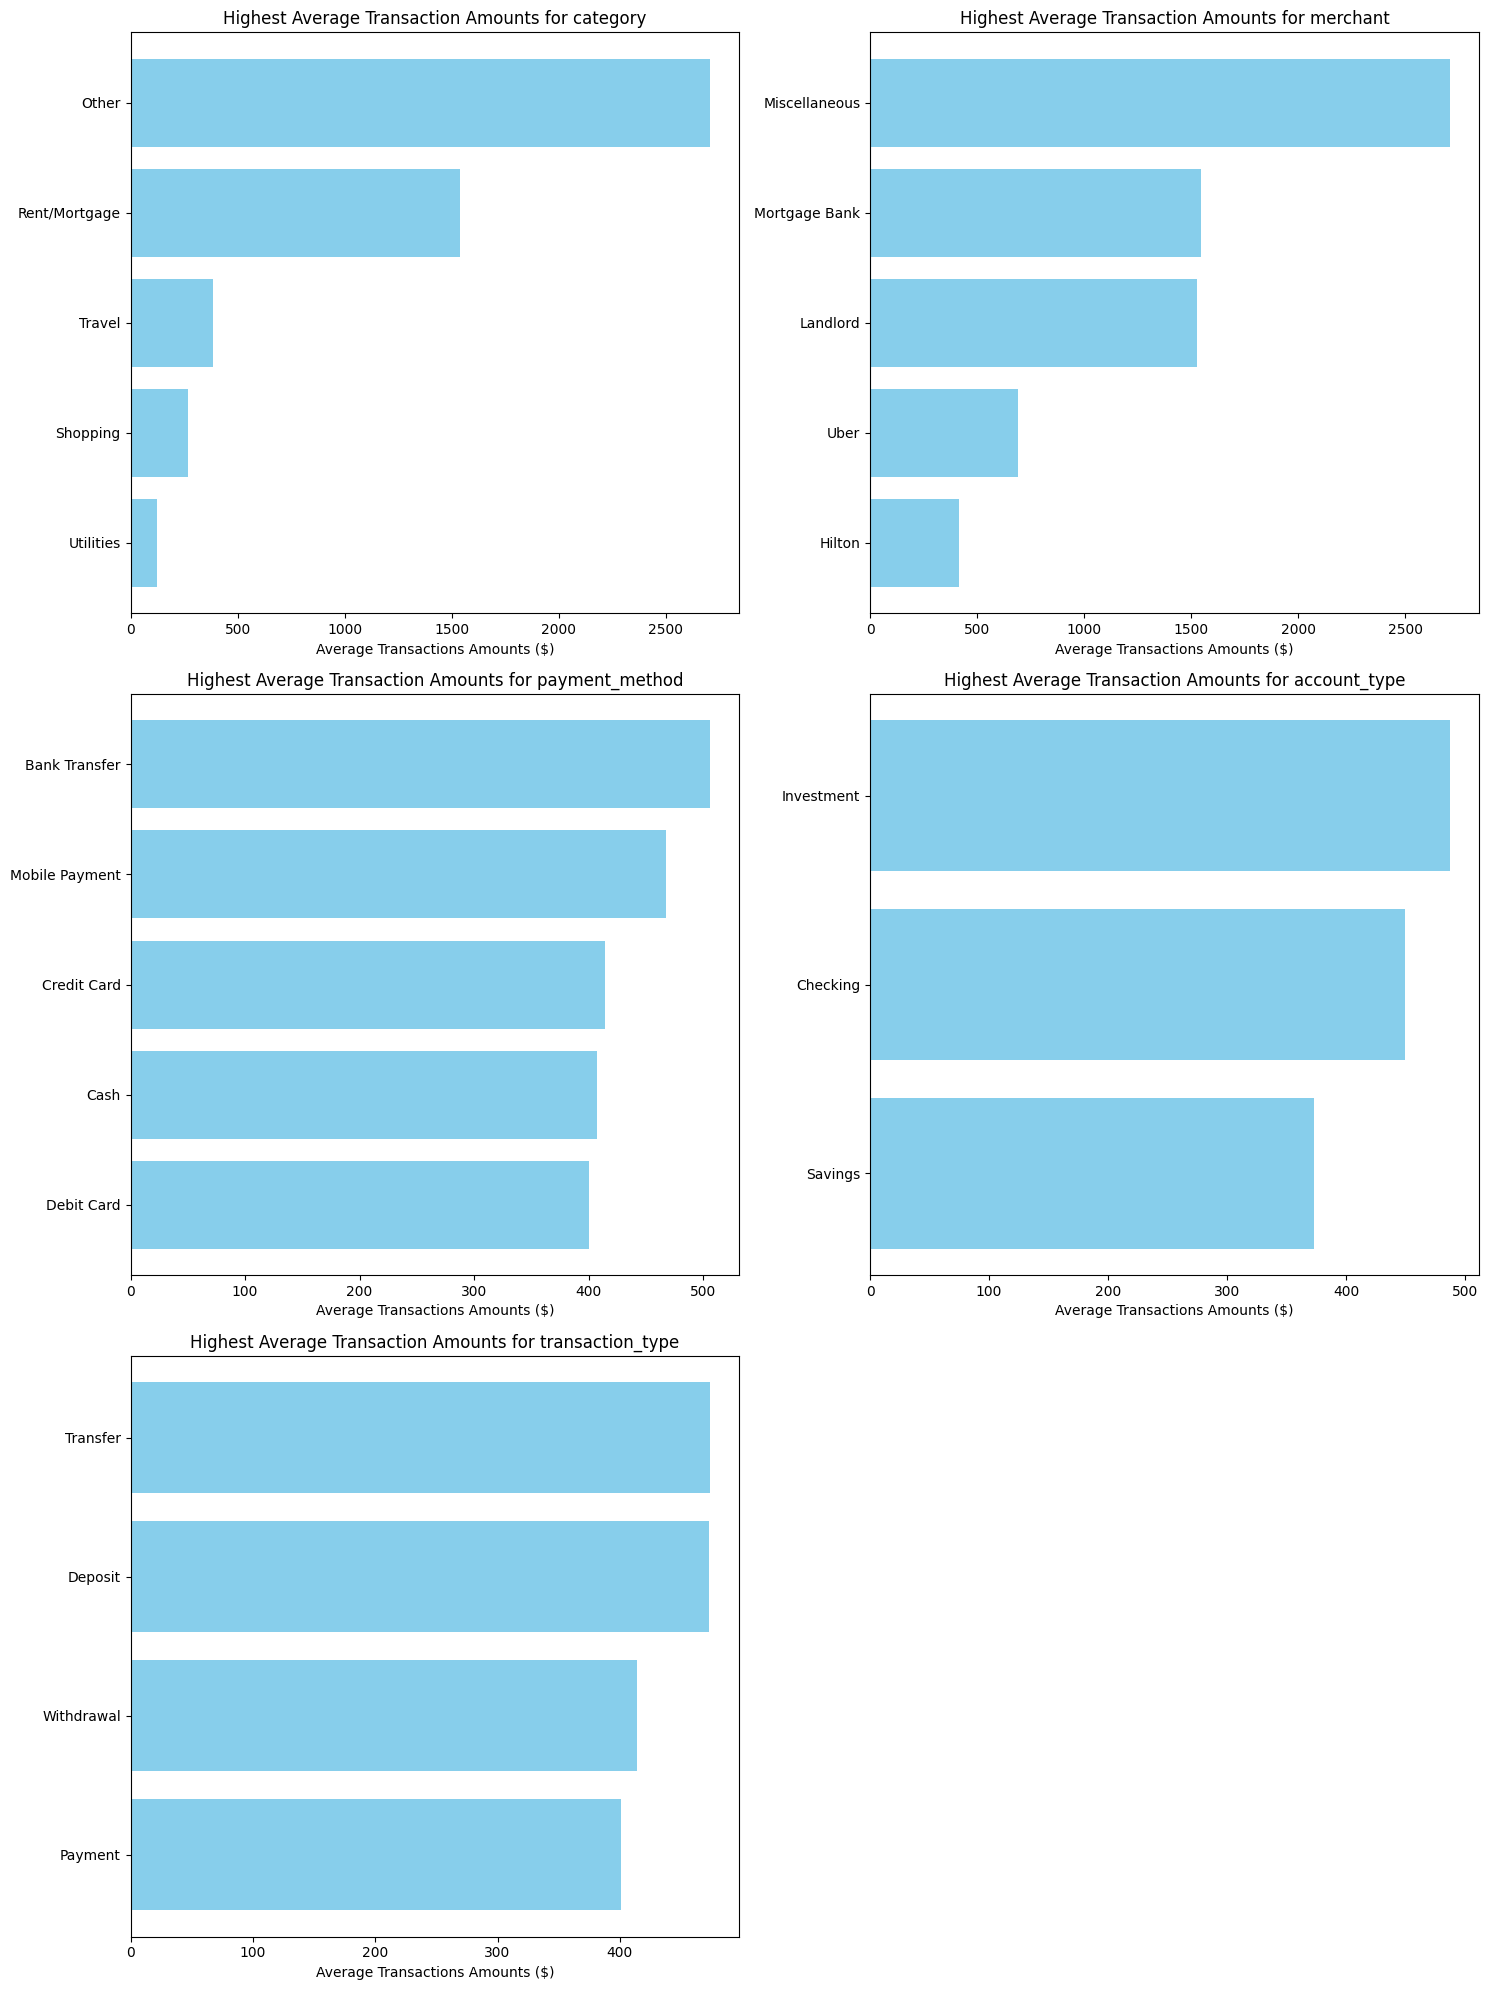

In [169]:
fig, ax = plt.subplots(3, 2, figsize=(15, 20))

ax = ax.flatten()

for i, col in enumerate(breakdown_cols):
    avg_amounts = (
        df_ft.groupby(col)['amount']
        .mean()
        .round(2)
        .sort_values(ascending=False)
        .head(5)  # top 5 only
    )
    # plot the number of transactions for each categorical breakdown
    ax[i].barh(avg_amounts.index, avg_amounts.values, color="skyblue")
    ax[i].set_title(f"Highest Average Transaction Amounts for {col}", fontsize=12)
    ax[i].set_xlabel("Average Transactions Amounts ($)")
    ax[i].invert_yaxis()

fig.delaxes(ax[5]) # remove empty subplot

plt.tight_layout()
plt.show()

The `category` with the highest average transaction amount is `Other`. We can plot a histogram to see the distribution of `Other` transaction amounts.

The transaction amount for the `category` of `Other` is equal to the transaction amount for `merchant` of `Miscellaneous`. It is safe to assume that whenever there is an `Other` in `category`, it would correspond to a `Miscellaneous` in `merchant`. However, because a lack of information relating to these transactions, these transactions should be put under tighter scrutiny.

Meanwhile other line items do not seem out-of-place. For example it is reasonable that average transaction amount for the `category` of `Rent/Mortgage` is $1536.28.

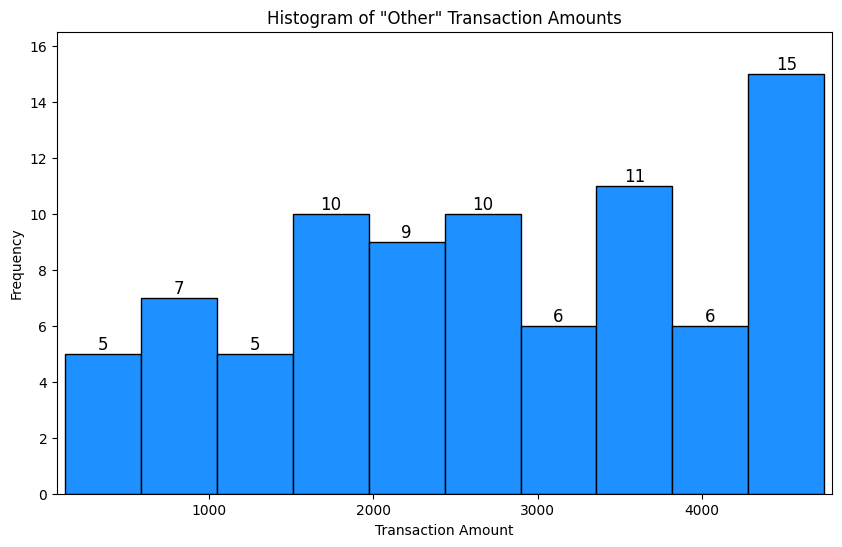

In [ ]:
other_cat_df = df_ft[df_ft['category'] == "Other"]

plt.figure(figsize=(10,6))

# plot histogram
values, bins, bars = plt.hist(other_cat_df['amount'],
                              color="dodgerblue",
                              edgecolor="black")

plt.xlabel("Transaction Amount ($)")
plt.ylabel("Frequency")
plt.title("Histogram of \"Other\" Transaction Amounts")
plt.bar_label(bars, fontsize=12, color='black')
plt.margins(x=0.01, y=0.1)
plt.show()

Most of the transactions in the `Other` `category` is more than $2,000, which are more than `Rent/Mortgage` transactions.

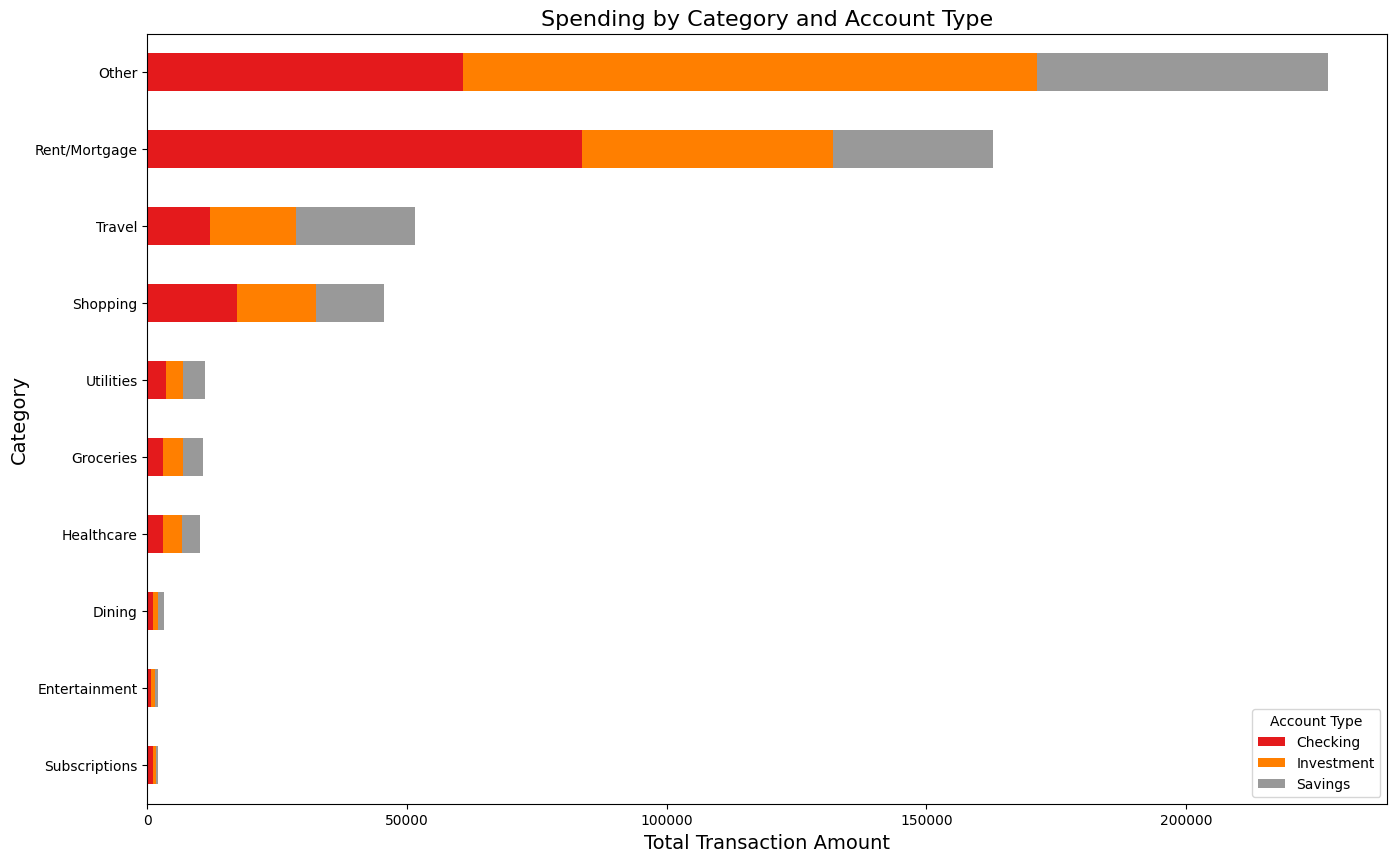

In [ ]:
# create a pivot table of total amount spent by category and account type
cat_by_at = df_ft.pivot_table(
    index='category',
    columns='account_type',
    values='amount',
    aggfunc='sum'
)

pivot = cat_by_at.loc[cat_by_at.sum(axis=1)
                      .sort_values()
                      .index]

# plot stacked horizontal bar chart
pivot.plot(kind='barh',
           stacked=True,
           figsize=(16,10),
           colormap='Set1')

plt.xlabel("Total Transaction Amount ($)", fontsize=14)
plt.ylabel("Category of Transaction", fontsize=14)
plt.title("Spending by Category and Account Type", fontsize=16)
plt.legend(title="Account Type",loc='lower right')
plt.show()

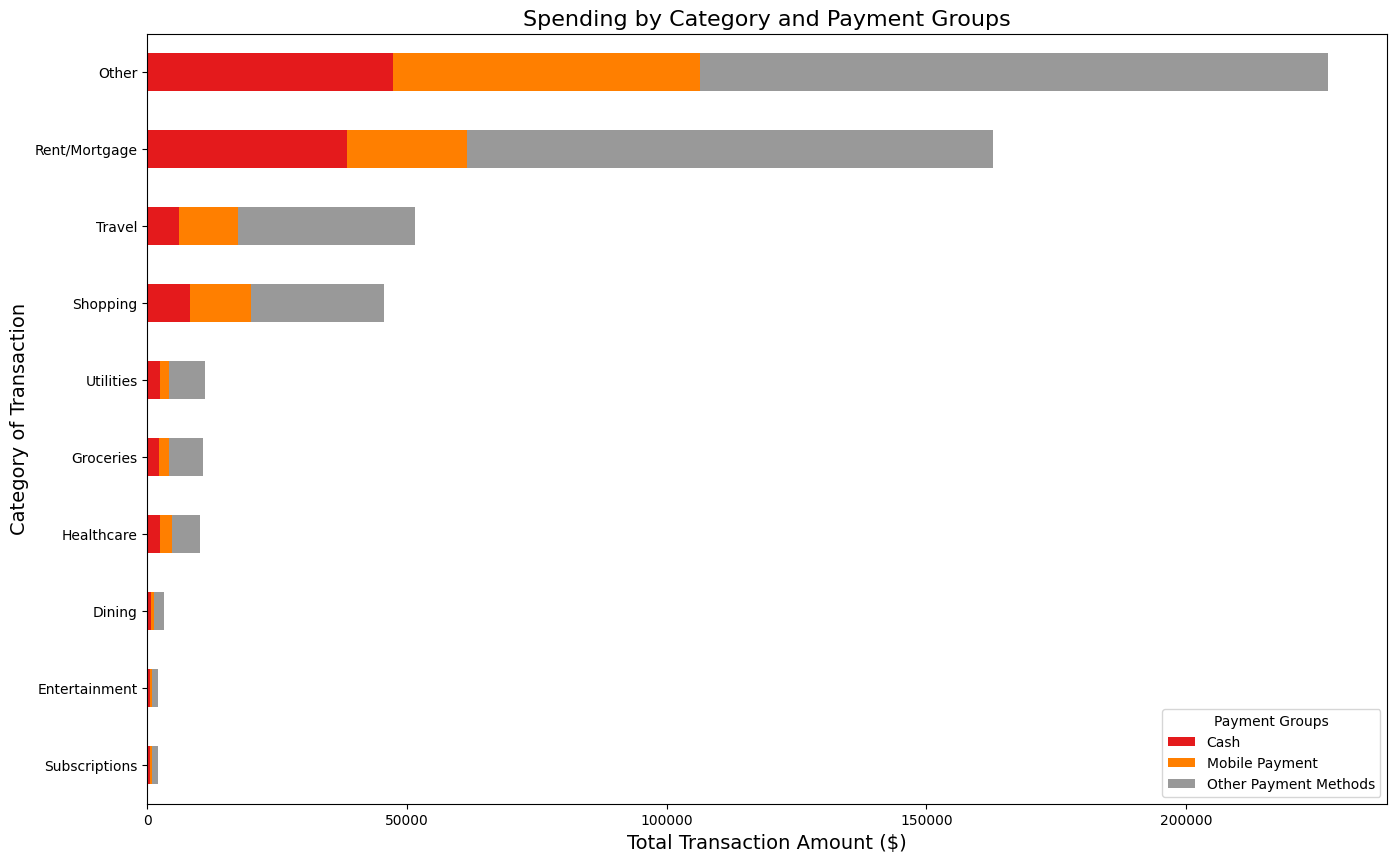

In [140]:
df_ft['risky_payment'] = df_ft['payment_method'].apply(
    lambda x: x if x in ["Cash", "Mobile Payment"] else "Other Payment Methods"
)

# create a pivot table of total amount spent by category and payment_method type
cat_by_pm = df_ft.pivot_table(
    index='category',
    columns='risky_payment',
    values='amount',
    aggfunc='sum'
)

pivot = cat_by_pm.loc[cat_by_pm.sum(axis=1)
                      .sort_values()
                      .index]

# plot stacked horizontal bar chart
pivot.plot(kind='barh',
           stacked=True,
           figsize=(16,10),
           colormap='Set1')

plt.xlabel("Total Transaction Amount ($)", fontsize=14)
plt.ylabel("Category of Transaction", fontsize=14)
plt.title("Spending by Category and Payment Groups", fontsize=16)
plt.legend(title="Payment Groups",loc='lower right')
plt.show()

In [28]:
pd.crosstab(df_ft['merchant'], df_ft['category'])

category,Dining,Entertainment,Groceries,Healthcare,Other,Rent/Mortgage,Shopping,Subscriptions,Travel,Utilities
merchant,,,,,,,,,,
AMC Theatres,0,28,0,0,0,0,0,0,0,0
Airbnb,0,0,0,0,0,0,0,0,32,0
Amazon,0,0,0,0,0,0,46,0,0,0
Amazon Prime,0,0,0,0,0,0,0,45,0,0
Apple Music,0,0,0,0,0,0,0,26,0,0
Best Buy,0,0,0,0,0,0,38,0,0,0
Chipotle,28,0,0,0,0,0,0,0,0,0
Clinic,0,0,0,33,0,0,0,0,0,0
Concert Hall,0,38,0,0,0,0,0,0,0,0


Eyeballing the cross table, the categories of financial transactions are consistent with their corresponding merchants.